In [1]:
import pandas as pd
import numpy as np

## Calcluate R2 Score Using Model 

In [12]:
data = pd.read_excel('ex_model_data.xlsx')
data

,X,Y
0,15,49
1,23,63
2,18,58
3,23,60
4,24,58
5,22,61
6,22,60
7,19,63
8,19,60
9,16,52


In [13]:
x = data.iloc[:, 0:1]
y = data.iloc[:, -1]

print(x)
print(y)

print(type(x))
print(type(y))

     X
0   15
1   23
2   18
3   23
4   24
5   22
6   22
7   19
8   19
9   16
10  24
11  11
12  24
13  16
14  23
0     49
1     63
2     58
3     60
4     58
5     61
6     60
7     63
8     60
9     52
10    62
11    30
12    59
13    49
14    68
Name: Y, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
print(x.shape)
print(y.shape)

(15, 1)
(15,)


In [15]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x,y)

y_pred = lr.predict(x)
print(y_pred)

[47.45652174 62.60810811 53.13836663 62.60810811 64.5020564  60.71415981
 60.71415981 55.03231492 55.03231492 49.35047004 64.5020564  39.88072855
 64.5020564  49.35047004 62.60810811]


In [16]:
diff = pd.DataFrame({
    'Actual':y,
    'Predicted':y_pred
})
print(diff)

    Actual  Predicted
0       49  47.456522
1       63  62.608108
2       58  53.138367
3       60  62.608108
4       58  64.502056
5       61  60.714160
6       60  60.714160
7       63  55.032315
8       60  55.032315
9       52  49.350470
10      62  64.502056
11      30  39.880729
12      59  64.502056
13      49  49.350470
14      68  62.608108


In [17]:
print("Coefficent :",lr.coef_) # M
print("Intercept :",lr.intercept_) # C

Coefficent : [1.8939483]
Intercept : 19.047297297297284


In [18]:
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y,y_pred)) # Abosulte Error
print("MSE :",metrics.mean_squared_error(y,y_pred)) # Sqaurd Error
print("R2 Score :",metrics.r2_score(y,y_pred))

MAE : 3.7412847630238946
MSE : 22.292068155111636
R2 Score : 0.7088287858527738


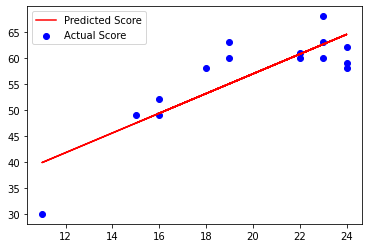

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color = 'blue',label = 'Actual Score')
plt.plot(x,y_pred,color = 'red',label='Predicted Score')
plt.legend()
plt.show()

R² score (linear fit): 0.96


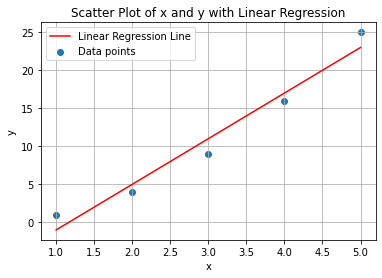

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])


model = LinearRegression()
model.fit(x.reshape(-1, 1), y) 
y_predicted = model.predict(x.reshape(-1, 1))

r2 = r2_score(y, y_predicted)
print(f"R² score (linear fit): {r2:.2f}")

plt.scatter(x, y, label="Data points")
plt.plot(x, y_predicted, color='red', label="Linear Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y with Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

# =============================================================

In [114]:
bdata = pd.read_csv('Book1.csv')
bdata

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [115]:
bdata.isna().sum()

cgpa       0
package    0
dtype: int64

In [116]:
bdata.dtypes

cgpa       float64
package    float64
dtype: object

In [117]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [118]:
x = bdata.iloc[:,0:1]
y = bdata.iloc[:,1]

print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [119]:
print(x)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]


In [120]:
print(y)

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [121]:
#Split the data in training & testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 19)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [122]:
#Creating LinearRegression Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
print(y_pred)

[4.38757493 3.54100435 2.64260291 2.56773612 2.97662396 2.34313577
 3.34519891 3.17818838 2.37768967 4.12842067 3.65042503 2.78081852
 2.92479311 2.55045917 2.38344865 4.34726204 3.46613756 2.8211314
 3.23001923 2.71171071 3.08604464 2.21643813 2.63684393 3.00541888
 2.55045917 2.95358802 3.33943992 1.61750384 2.34889475 2.61380799
 1.93424793 2.14157134 3.21274228 3.22426025 3.77136369 3.73680979
 2.49286934 3.2069833  3.22426025 2.24523305]


In [123]:
diff = pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_pred
})
print(diff)

     Actual  Predicted
40     4.02   4.387575
140    3.15   3.541004
33     2.73   2.642603
91     2.14   2.567736
13     2.89   2.976624
94     2.42   2.343136
148    3.40   3.345199
20     3.16   3.178188
196    2.57   2.377690
163    3.91   4.128421
31     3.89   3.650425
78     2.21   2.780819
16     2.35   2.924793
180    2.72   2.550459
37     2.43   2.383449
169    4.37   4.347262
72     3.62   3.466138
105    2.82   2.821131
152    3.08   3.230019
157    2.70   2.711711
117    2.99   3.086045
60     2.19   2.216438
62     2.09   2.636844
155    3.09   3.005419
190    2.69   2.550459
41     2.70   2.953588
59     3.31   3.339440
193    1.94   1.617504
132    2.48   2.348895
150    2.73   2.613808
1      1.98   1.934248
61     1.61   2.141571
34     3.42   3.212742
30     3.26   3.224260
26     3.42   3.771364
192    3.75   3.736810
8      2.31   2.492869
125    3.16   3.206983
64     2.92   3.224260
147    2.21   2.245233


In [124]:
print("Coefficent :",lr.coef_) # M
print("Intercept :",lr.intercept_) # C

Coefficent : [0.57589836]
Intercept : -1.0143516483691801


In [125]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.18405380979816172
MSE:  0.06222087452033198
R2 Score:  0.8416316029332689


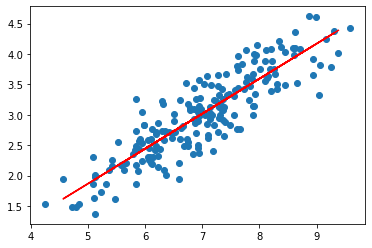

In [126]:
plt.scatter(bdata["cgpa"],bdata["package"])
plt.plot(x_test,y_pred,color="red")
plt.show()

In [134]:
 # Predict for 9.9
prediction = lr.predict([[8.5]])
print("Predict Package:",prediction)

Predict Package: [3.88078438]


0 0.7297167943957027
1 0.7283345498058083
2 0.780730147510384
3 0.6516754875100943
4 0.797266185221225
5 0.7576283066961189
6 0.7931883791241285
7 0.74999736702749
8 0.7750446547055034
9 0.7537489289007485
10 0.7681105472626018
11 0.7834680873599649
12 0.7814843672108371
13 0.7431142550564668
14 0.7319641370046674
15 0.6757798883208352
16 0.6056918235519968
17 0.6778264290984857
18 0.7524160321677125
19 0.8416316029332689
20 0.7415961128378261
21 0.8174090402563694
22 0.7507685626720515
23 0.7309298089286885
24 0.7575613457470172
25 0.8376622340186116
26 0.8048234457252446
27 0.7309557444768802
28 0.8060228914356113
29 0.6999434392546031
30 0.7196907227282943
31 0.7847458684928423
32 0.8086536217796094
33 0.7574974746709521
34 0.7150369641356499
35 0.8411951968894585
36 0.8106133427774883
37 0.7015301996955197
38 0.8236213089926823
39 0.7510679098555051
40 0.6462843124730797
41 0.7950830105648082
42 0.7730984312051673

[0.7297167943957027, 0.7283345498058083, 0.780730147510384, 0.65167

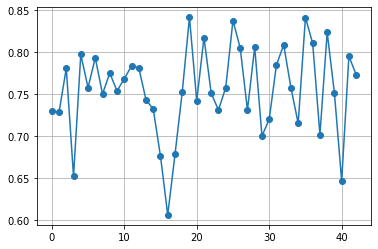

In [112]:
#Split the data in training & testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

x = bdata.iloc[:,0:1]
y = bdata.iloc[:,1]
lr=LinearRegression()
ac_ls = []
for i in range(0,43):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
    
    #Creating LinearRegression Model
    
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)


    diff = pd.DataFrame({
        'Actual': y_test,
        'Predicted':y_pred
    })
    ans = metrics.r2_score(y_test,y_pred)
    print(i,ans)
    ac_ls.append(ans)

print()
print(ac_ls)

x = range(0,43)
plt.plot(x, ac_ls, marker = 'o')
plt.grid(True)
plt.show()

# =============================================================